# Model selection - Python - grid search

In [1]:
import multiprocessing

num_cpu = multiprocessing.cpu_count()
num_cpu

16

In [2]:
import pandas as pd

dataset = pd.read_csv('data/social_network_ads.csv')
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15811177,Female,35.0,77000.0,0
1,15600575,Male,25.0,33000.0,0
2,15622478,Male,47.0,43000.0,0
3,15581198,Male,31.0,74000.0,0
4,15807837,Male,48.0,33000.0,1


In [3]:
X = dataset.iloc[:, [2, 3]].values
X[:5, :]

array([[3.5e+01, 7.7e+04],
       [2.5e+01, 3.3e+04],
       [4.7e+01, 4.3e+04],
       [3.1e+01, 7.4e+04],
       [4.8e+01, 3.3e+04]])

In [4]:
y = dataset.iloc[:, 4].values
y[:5]

array([0, 0, 0, 0, 1])

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC

# SVC has hyperparameters like gamma and C
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [8]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred[:5]

array([1, 1, 0, 1, 0])

In [9]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[55,  3],
       [ 3, 39]])

In [10]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies

array([0.8       , 0.96666667, 0.93333333, 0.86666667, 0.86666667,
       0.93333333, 0.9       , 0.93333333, 0.83333333, 0.93333333])

In [11]:
accuracies.mean()

0.8966666666666667

In [12]:
accuracies.mean()

0.050442486501405176

In [13]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

# create dictionaries of possible values that GridSearch will analyze
# C : penalty parameter of the error term, if we increase it too much we will underfit
# gamma : coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’, if auto : 1/n_features used
# test for linear and non linear kernel
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf', 'poly', 'sigmoid'], 'gamma': [0.03, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
parameters

[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
 {'C': [1, 10, 100, 1000],
  'kernel': ['rbf', 'poly', 'sigmoid'],
  'gamma': [0.03, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [14]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy', # can be recall, precision, ...
                           cv = 10, # as k-Fold cross validation
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [15]:
best_accuracy = grid_search.best_score_
best_accuracy

0.9166666666666667

In [16]:
best_parameters = grid_search.best_params_
best_parameters

{'C': 100, 'gamma': 0.4, 'kernel': 'rbf'}

In [19]:
classifier = SVC(kernel = 'rbf', C=100, gamma=0.4, random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.4, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies

In [ ]:
accuracies.mean()

In [ ]:
accuracies.mean()

In [ ]:
%matplotlib inline

# Visualising the Training set results
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
%matplotlib inline

# Visualising the Test set results
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

array([[55,  3],
       [ 3, 39]])

In [21]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies

array([0.9       , 0.96666667, 0.9       , 0.86666667, 0.86666667,
       0.96666667, 0.93333333, 0.96666667, 0.86666667, 0.93333333])

In [22]:
accuracies.mean()

0.9166666666666667

In [23]:
accuracies.mean()

0.9166666666666667

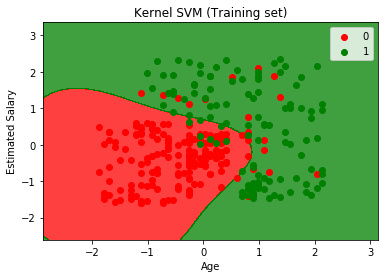

In [16]:
%matplotlib inline

# Visualising the Training set results
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


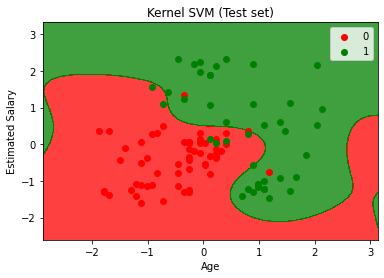

In [24]:
%matplotlib inline

# Visualising the Test set results
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()